In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
# --- 1. VARIABLE: Title (TITULO) ---

def title_feature(df):
    # Avoid inplace=True
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'Title':")
    print(df['Title'].value_counts())
    return df

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3243004855.py:5: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
# --- 2. VARIABLE: FamilySize (TAMAÑO DE LA FAMILIA) ---

def family_size_feature(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'FamilySize':")
    print(df['FamilySize'].value_counts().sort_index())
    print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'FamilySize':")
    print(df['FamilySize'].describe())
    return df

In [ ]:
# --- 3. VARIABLE: IsAlone (ESTA SOLO) ---

def is_alone_feature(df):
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'IsAlone':")
    print(df['IsAlone'].value_counts())
    print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'IsAlone':")
    print(df['IsAlone'].describe())
    return df

In [ ]:
# --- 4. VARIABLE: AgeGroup (GRUPO DE EDAD) ---
# MANEJO DE VALORES NULOS PARA LA EDAD

def age_group_feature(df):
      # Avoid inplace=True
      df['Age'] = df['Age'].fillna(df['Age'].median())
      bins = [0, 12, 18, 60, np.inf]
      labels = ['Child', 'Adolescent/Teenager', 'Adult', 'Senior']
      df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
      # VERIFICACIÓN DE CALIDAD
      print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'AgeGroup':")
      print(df['AgeGroup'].value_counts())
      return df

In [ ]:
# --- 5. VARIABLE: FarePerPerson (TARIFA POR PERSONA) ---

def fare_per_person_feature(df):
    df['FarePerPerson'] = df['Fare'] / df['FamilySize']
    # Avoid inplace=True
    df['FarePerPerson'] = df['FarePerPerson'].fillna(df['FarePerPerson'].mean()) # Manejo de Nulos
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'FarePerPerson':")
    print(df['FarePerPerson'].describe())
    return df

In [ ]:
# --- 6. VARIABLE: CabinDeck (CUBIERTA DE LA CABINA) ---

def cabin_deck_feature(df):
    df['CabinDeck'] = df['Cabin'].str.extract('([A-Z])', expand=False)
    # Avoid inplace=True
    df['CabinDeck'] = df['CabinDeck'].fillna('Unknown')
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'CabinDeck':")
    print(df['CabinDeck'].value_counts())
    return df

In [ ]:
# --- 7. VARIABLE: CabinKnown (CABINA CONOCIDA) ---

def cabin_known_feature(df):
  df['CabinKnown'] = df['Cabin'].isnull().astype(int)
  # VERIFICACIÓN DE CALIDAD
  print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'CabinKnown':")
  print(df['CabinKnown'].value_counts())
  print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'CabinKnown':")
  print(df['CabinKnown'].describe())
  return df

In [ ]:
# --- 8. VARIABLE: TicketFrequency (FREQUENCIA DE TICKEY ) ---

def ticket_frequency_feature(df):
  df['TicketFrequency'] = df.groupby('Ticket')['Ticket'].transform('count')
  # VERIFICACIÓN DE CALIDAD
  print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'TicketFrequency':")
  print(df['TicketFrequency'].value_counts().sort_index())
  print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'TicketFrequency':")
  print(df['TicketFrequency'].describe())
  return df

In [ ]:
# --- 9. VARIABLE: NameLength (LONGITUD DE NOMBRE ) ---

def name_length_feature(df):
  df['NameLength'] = df['Name'].str.len()
  # VERIFICACIÓN DE CALIDAD
  print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'NameLength':")
  print(df['NameLength'].value_counts().sort_index())
  print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'NameLength':")
  print(df['NameLength'].describe())
  return df

In [ ]:
# --- 10. VARIABLE: HasCabinNeighbor (CABINAS CERCANAS CON FAMILIARES ) ---

def has_cabin_neighbor_feature(df):
    df['HasCabinNeighbor'] = df['Cabin'].notnull().astype(int)
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'HasCabinNeighbor':")
    print(df['HasCabinNeighbor'].value_counts())
    print("\nVERIFICACIÓN DE LA DISTRIBUCIÓN para 'HasCabinNeighbor':")
    print(df['HasCabinNeighbor'].describe())
    return df

In [ ]:
# --- 11. VARIABLE: TicketPrefix (PREFIJO DEL TCIKET ) ---

def ticket_prefix_feature(df):
    df['TicketPrefix'] = df['Ticket'].str.extract(r'([A-Za-z]+)\d*')
    # Avoid inplace=True
    df['TicketPrefix'] = df['TicketPrefix'].fillna('Unknown')
    # VERIFICACIÓN DE CALIDAD
    print("\nVERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'TicketPrefix':")
    print(df['TicketPrefix'].value_counts())
    return df

In [ ]:
df.head()
df.shape

(891, 12)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# La clase TitanicDatasetPreprocessor nos sirve para preprocesar los datos, ubicados en
# el dataframe del titanic llamado df, lo cual no sirve para alimentar modelos de
# machine learning a través de tres/3 funcionalidades que viene siendo:


# 1. Crear nuevas variables a partir de variables existentes (feature engineering)
# 2. Validar que estas variables estén correctas
# 3. Transformar los datos para que sean númericos y escalables para un modelo de ML.



class TitanicDatasetPreprocessor:
    """
    Clase de preprocesamiento para el dataset del Titanic.

    Esta clase nos sirve para preparar los datos del Titanic y alimentar modelos de
    machine learning a través de tres funcionalidades principales:

    1. Crear nuevas variables a partir de variables existentes (feature engineering).
    2. Validar que estas variables estén correctas.
    3. Transformar los datos para que sean numéricos y escalables para un modelo de ML.
    """

    def __init__(self):
        self.pipeline = None  # Con pipeline, podemos guardar el objeto de transformación que aplica el escalado
        self.feature_engineered = False # Con feature engineered, tenemos un flag que indica si las nuevas columnas/variables han sido creadas
        self.output_feature_names_ = None
        self.categorical_cols_to_drop = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] # Original categorical columns to drop
        # Explicitly define categorical columns including engineered ones
        self.cat_cols = [
            "Title", "AgeGroup", "CabinDeck", "TicketPrefix",
            "Sex*Class", "Sex*AgeGroup"
        ]
        # Explicitly define numerical columns (excluding original and target)
        # Excluimos 'PassengerId' ya que es un identificador y no una característica predictiva.
        self.num_cols = [
            "Pclass", "Age", "SibSp", "Parch", "Fare",
            "FamilySize", "IsAlone", "FarePerPerson", "CabinKnown",
            "TicketFrequency", "NameLength", "HasCabinNeighbor",
            "Age*Class", "Fare*Embarked", "Family*Class"
        ]


    # Validación continua
    # Verificamos que la columna exista, checamos cuantos valores nulos hay, nos aseguramos que la columan sea el tipo de dato correcto
    # y checamos cuantos valores unicos hay.
    # Si no cumple ninguna de las condiciones entonces nos marca error

    def _validate_feature(self, df, col, expected_dtype=None, max_unique=None):
        """
        Verifica que la columna exista, cuántos valores nulos hay,
        que tenga el tipo de dato correcto y no demasiados valores únicos.
        """
        assert col in df.columns, f"Columna {col} no fue creada."
        assert df[col].isnull().mean() < 0.2, f"Columna {col} tiene demasiados valores nulos."
        if expected_dtype:
            assert df[col].dtype == expected_dtype, f"{col} debería ser {expected_dtype}, pero es {df[col].dtype}."
        if max_unique:
            assert df[col].nunique() <= max_unique, f"{col} tiene demasiados valores únicos ({df[col].nunique()})."
        print(f"Validación pasada: {col}")

    # Tratamiento de outliers con IQR
    # (Aquí se investigar si hay valores atípicos y/o extremos)


    def _treat_outliers(self, df, cols):
        """
        Tratamiento de outliers usando IQR (rango intercuartílico).
        Los valores extremos se "recortan" (clip) para reducir su impacto.
        """
        for col in cols:
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                df[col] = np.clip(df[col], lower, upper)
                print(f"Outliers tratados en {col}")
        return df

    # Visualización de outliers


    def visualize_outliers(self, df, cols):
        """
        Visualización de outliers con boxplot e histograma.
        Útil para diagnosticar variables antes y después del tratamiento.
        """
        for col in cols:
            if col in df.columns:
                fig, axes = plt.subplots(1, 2, figsize=(12, 4))
                sns.boxplot(x=df[col], ax=axes[0])
                axes[0].set_title(f"Boxplot de {col}")
                sns.histplot(df[col], bins=30, kde=True, ax=axes[1])
                axes[1].set_title(f"Distribución de {col}")
                plt.tight_layout()
                plt.show()


     # Feature Engineering

    def _feature_engineering(self, df):
        """
        Aplicamos funciones de feature engineering personalizadas.
        """
        feature_funcs = [
            title_feature, family_size_feature, is_alone_feature, age_group_feature,
            fare_per_person_feature, cabin_deck_feature, cabin_known_feature,
            ticket_frequency_feature, name_length_feature, has_cabin_neighbor_feature,
            ticket_prefix_feature
        ]
        for func in feature_funcs:
            df = func(df)

        # Revisamos que la hayan creado ciertas features
        # Validación de columnas críticas
        for col in ["Title", "FamilySize", "IsAlone", "AgeGroup", "FarePerPerson"]:
            self._validate_feature(df, col)

        # Agregamos interacciones entre features
        df = self._feature_interactions(df)
        return df

    # Interacciones de Features

    def _feature_interactions(self, df):
        """
        Creación de variables de interacción entre sexo, edad, clase, tarifa y familia.
        """
        df["Sex*Class"] = df["Sex"].astype(str) + "_" + df["Pclass"].astype(str)
        df["Age*Class"] = pd.cut(df["Age"], bins=[0,12,18,40,60,80], labels=False) * df["Pclass"]
        df["Sex*AgeGroup"] = df["Sex"].astype(str) + "_" + df["AgeGroup"].astype(str)
        # Handle potential NaN or non-numeric values in Embarked before factorization
        df["Fare*Embarked"] = pd.qcut(df["Fare"], 4, labels=False) * df["Embarked"].fillna('Unknown').factorize()[0]
        df["Family*Class"] = df["FamilySize"] * df["Pclass"]

        for col in ["Sex*Class", "Age*Class", "Sex*AgeGroup", "Fare*Embarked", "Family*Class"]:
            self._validate_feature(df, col)

        return df


    # Fit - Aprende de los parámetros de Transformación

    def fit(self, X, y=None):
        """
        Prepara el pipeline: define columnas numéricas y categóricas,
        aplica imputación, escalado y OneHotEncoder.
        """
        X_proc = self._feature_engineering(X.copy())
        self.feature_engineered = True

        # Identify numerical and categorical columns based on explicit lists
        # Ensure these columns exist in the processed dataframe
        num_cols_pipeline = [col for col in self.num_cols if col in X_proc.columns]
        cat_cols_pipeline = [col for col in self.cat_cols if col in X_proc.columns]


        # Rellenamos nulos con la mediana y luego escalamos los datos
        num_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ])

        # Rellenamos nulos con la moda y aplicamos One-Hot encoding
        cat_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

        # Create the ColumnTransformer with explicitly defined column lists, no remainder
        self.pipeline = ColumnTransformer(transformers=[
            ("num", num_transformer, num_cols_pipeline),
            ("cat", cat_transformer, cat_cols_pipeline)
        ], remainder='drop') # Explicitly drop other columns


        # Select only the columns intended for the pipeline before fitting
        cols_for_pipeline = num_cols_pipeline + cat_cols_pipeline
        X_proc_for_pipeline = X_proc[cols_for_pipeline]


        self.pipeline.fit(X_proc_for_pipeline)

        # Guardamos los nombres de features finales (para evitar un shape mismatch)
        # en otras palabras, evitamos que el dataframe original y el dataframe con los valores
        # transformados no sean del mismo tamaño
        # The order of columns in the output will be num_cols_pipeline + one-hot encoded cat_cols_pipeline
        self.output_feature_names_ = (
            num_cols_pipeline +
            list(self.pipeline.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(cat_cols_pipeline))
        )
        return self

    # Transform - Aplica las transformaciones a un nuevo dataset

    def transform(self, X):
        """
        Aplica las transformaciones al dataset (imputación, escalado y encoding).
        """
        if not self.feature_engineered:
            raise RuntimeError("Primero usa fit() en datos de entrenamiento.")
        X_proc = self._feature_engineering(X.copy())

        # Identify numerical and categorical columns based on explicit lists used during fit
        num_cols_pipeline = [col for col in self.num_cols if col in X_proc.columns]
        cat_cols_pipeline = [col for col in self.cat_cols if col in X_proc.columns]


        # Select only the columns intended for the pipeline before transforming
        cols_for_pipeline = num_cols_pipeline + cat_cols_pipeline
        X_proc_for_pipeline = X_proc[cols_for_pipeline]


        X_out = self.pipeline.transform(X_proc_for_pipeline)


        return pd.DataFrame(X_out, columns=self.output_feature_names_, index=X.index)


    # Combinación de Fit y de Transform
    def fit_transform(self, X, y=None):
        """
        Combina fit() y transform() en una sola llamada.
        """
        return self.fit(X, y).transform(X)

In [ ]:
# Creamos una instancia de TitanicDatasetPreprocessor y realizamos un fit para los datos
preprocessor = TitanicDatasetPreprocessor()
preprocessor.fit(df)

# Ahora, usamos TitanicDatasetPreprocessor ya con los parametros de transformación para utilizar
# el metodo de transformación para ver el output del pipeline
df_transformed_correct = preprocessor.transform(df.copy())

# Finalmente, desplegamos el shape de los datos transformados y  los primeros cinco renglones
print("Shape de los datos transformados:", df_transformed_correct.shape)
print("\nPrimeros 5 renglones de los datos transformados:")
display(df_transformed_correct.head())


VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'Title':
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'FamilySize':
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

VERIFICACIÓN DE LA DISTRIBUCIÓN para 'FamilySize':
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'IsAlone':
IsAlone
1    537
0    354
Name: count, dtype: int64

VERIFICACIÓN DE LA DISTRIBUCIÓN para 'IsAlone':
count    891.000000
mean       0.602694
std        0.489615
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: IsAlone, dtype: float64

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'AgeGroup':
AgeGr

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FarePerPerson,CabinKnown,TicketFrequency,NameLength,HasCabinNeighbor,Age*Class,Fare*Embarked,Family*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Adolescent/Teenager,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Senior,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_Unknown,TicketPrefix_A,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_F,TicketPrefix_Fa,TicketPrefix_LINE,TicketPrefix_P,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S,TicketPrefix_SC,TicketPrefix_SCO,TicketPrefix_SO,TicketPrefix_SOTON,TicketPrefix_STON,TicketPrefix_SW,TicketPrefix_Unknown,TicketPrefix_W,TicketPrefix_WE,Sex*Class_female_1,Sex*Class_female_2,Sex*Class_female_3,Sex*Class_male_1,Sex*Class_male_2,Sex*Class_male_3,Sex*AgeGroup_female_Adolescent/Teenager,Sex*AgeGroup_female_Adult,Sex*AgeGroup_female_Child,Sex*AgeGroup_female_Senior,Sex*AgeGroup_male_Adolescent/Teenager,Sex*AgeGroup_male_Adult,Sex*AgeGroup_male_Child,Sex*AgeGroup_male_Senior
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.059160,-1.231645,-0.454798,0.544925,-0.579162,-0.427451,-0.544925,0.730545,-0.426678,0.313490,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.059160,-1.231645,0.438994,-1.835115,-0.579162,2.590962,1.835115,-1.039449,2.177227,-0.514737,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.560975,0.811922,-0.334757,0.544925,-0.579162,-0.535252,-0.544925,0.730545,-0.426678,-0.307680,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.059160,-1.231645,0.185187,-1.835115,0.155928,1.836359,1.835115,-1.039449,-0.426678,-0.514737,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.560975,0.811922,-0.331267,0.544925,-0.579162,-0.319651,-0.544925,0.730545,-0.426678,-0.307680,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# 1. Importamos librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# 2. Cargamos el dataset Titanic
df_new = pd.read_csv("Titanic-Dataset.csv")

print("Shape original:", df.shape)
df_new.head()

# 3. Separamos los features y el target
y = df_new["Survived"]  # variable objetivo
X = df_new.drop(columns=["Survived"])

# 4. Realizamos el preprocesamiento con el pipeline
preprocessor = TitanicDatasetPreprocessor()
X_transformed = preprocessor.fit_transform(X)
X_df = X_transformed


print("Shape transformado:", X_df.shape)
X_df.head()

# 5. Realizamos el Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Capa de seguridad para verificar prevenir valores nulos
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


print(f"\nNumber of NaNs in X_train before fitting model:\n{np.isnan(X_train).sum()}")
print(f"\nNumber of NaNs in X_test before predicting:\n{np.isnan(X_test).sum()}")

Shape original: (891, 12)

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'Title':
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'FamilySize':
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

VERIFICACIÓN DE LA DISTRIBUCIÓN para 'FamilySize':
count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

VERIFICACIÓN DE VALORES ÚNICOS Y CONTEO para 'IsAlone':
IsAlone
1    537
0    354
Name: count, dtype: int64

VERIFICACIÓN DE LA DISTRIBUCIÓN para 'IsAlone':
count    891.000000
mean       0.602694
std        0.489615
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: IsAlone, dtype: float64

VERIFICACIÓN DE VALORES ÚNICOS Y CON

In [79]:
# Definimos modelos y sus parametros
from sklearn.svm import SVC

models_and_params = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(max_iter=200, solver="liblinear", class_weight="balanced"),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(probability=True, random_state=42, class_weight='balanced'), # probability=True needed for ROC/PR AUC
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
            'degree': [2, 3, 4] # Only for 'poly' kernel
        }
    }
]

# Ejecuta el GridSearchCV (prueba de todas las combinaciones posibles) para cada modelo
best_models = {}

for item in models_and_params:
    print(f"--- Tuning {item['name']} ---")

    # Handle degree parameter only for poly kernel
    param_grid = item['params'].copy()
    if item['name'] == 'Support Vector Machine':
        # Filter out degree for non-poly kernels during grid search
        param_grid = [
            {'C': param_grid['C'], 'kernel': ['rbf', 'sigmoid'], 'gamma': param_grid['gamma']},
            {'C': param_grid['C'], 'kernel': ['poly'], 'gamma': param_grid['gamma'], 'degree': param_grid['degree']}
        ]


    grid_search = GridSearchCV(item['model'], param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train) # Usamos X_train and y_train

    best_models[item['name']] = grid_search.best_estimator_

    print(f"Best parameters for {item['name']}: {grid_search.best_params_}")
    print(f"Best ROC-AUC score for {item['name']}: {grid_search.best_score_}")
    print("-" * 30)

--- Tuning Logistic Regression ---
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1'}
Best ROC-AUC score for Logistic Regression: 0.8728227415218012
------------------------------
--- Tuning Random Forest ---
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best ROC-AUC score for Random Forest: 0.8823708875589753
------------------------------
--- Tuning Gradient Boosting ---
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best ROC-AUC score for Gradient Boosting: 0.8840328177279588
------------------------------
--- Tuning Support Vector Machine ---
Best parameters for Support Vector Machine: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best ROC-AUC score for Support Vector Machine: 0.8738910790243078
------------------------------



--- Evaluación de Modelos Ajustados en el Conjunto de Pruebas/Test Set ---

--- Métricas Básicas ---

--- Logistic Regression ---

Accuracy:

0.8100558659217877

Precision:

0.7464788732394366

Recall:

0.7681159420289855

F1 Score:

0.7571428571428571

ROC-AUC:

0.8852437417654809

PR-AUC:

0.8320190376966633

Balanced Accuracy:

0.8022397891963109

MCC:

0.6013972933448685
------------------------------

--- Métricas por Clase/Grupo ---

Matriz de Confusión:


Métricas desagregadas por:


Género:


Métricas desagregadas por 'Sex':
  Grupo 'male':
    - Accuracy: 0.8051
    - Precision: 0.5294
    - Recall: 0.3750
    - F1-Score: 0.4390
    - ROC-AUC: 0.7682
    - PR-AUC: 0.5221
    - Balanced Accuracy: 0.6449
    - MCC: 0.3323
  Grupo 'female':
    - Accuracy: 0.8197
    - Precision: 0.8148
    - Recall: 0.9778
    - F1-Score: 0.8889
    - ROC-AUC: 0.8736
    - PR-AUC: 0.9070
    - Balanced Accuracy: 0.6764
    - MCC: 0.4869

Clase socioeconómica:


Métricas desagregadas por 'Pclass

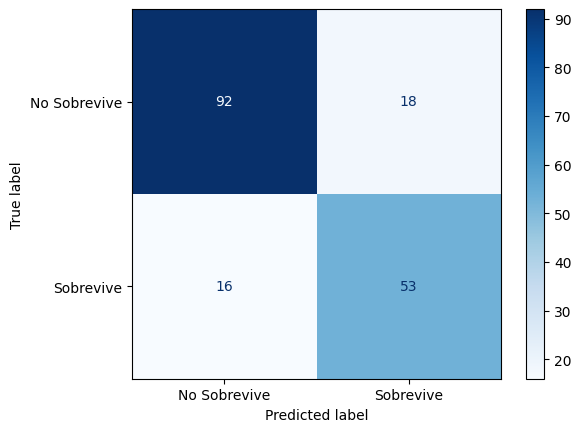

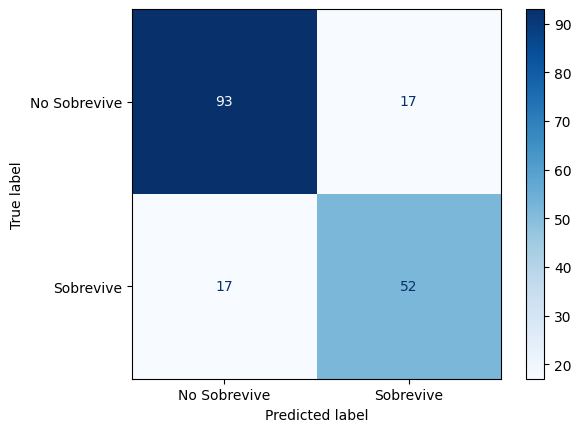

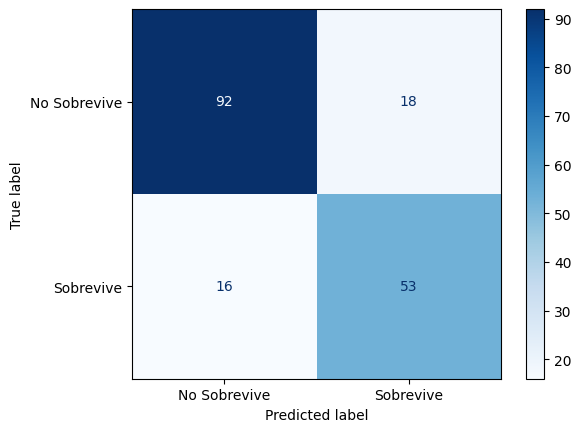

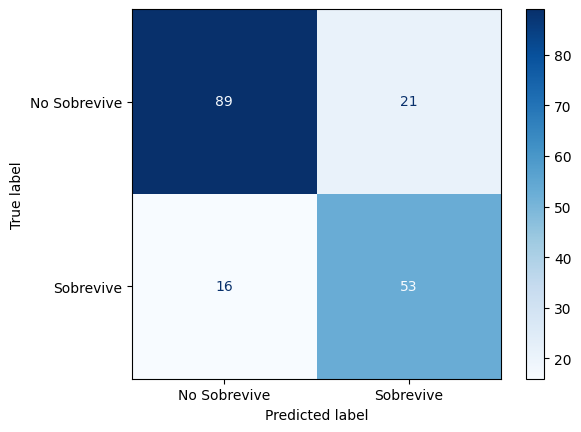

In [80]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, balanced_accuracy_score,
    matthews_corrcoef, brier_score_loss, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)

# Evaluamos las mejores versiones de cada modelo solicitado dentro del test set
print("\n--- Evaluación de Modelos Ajustados en el Conjunto de Pruebas/Test Set ---")

# Calculamos métricas de evaluación desagregadas para diferentes subgrupos utilizando el dataframe original como referencia
# para así identificar sesgos o áreas en donde el modelo podría tener dificultades
def evaluate_by_group_Original_Dataset(df_original, y_test, y_pred, y_proba, group_column):
    """
    Calculamos las métricas desagregadas por un grupo específico usando el dataframe original.
    """
    # Nos aseguramos de alinear el dataframe original con el indice del test set
    df_original_aligned = df_original.loc[y_test.index]
    unique_groups = df_original_aligned[group_column].unique()
    results = {}
    for group in unique_groups:
        # Creamos un indice booleano
        group_index = df_original_aligned[group_column] == group

        # Aplicamos el indice booleano
        y_test_group = y_test[group_index]
        y_pred_group = y_pred[group_index]
        y_proba_group = y_proba[group_index]


        if len(y_test_group) > 0 and len(np.unique(y_test_group)) > 1:
            results[group] = {
                "Accuracy": accuracy_score(y_test_group, y_pred_group),
                "Precision": precision_score(y_test_group, y_pred_group),
                "Recall": recall_score(y_test_group, y_pred_group),
                "F1-Score": f1_score(y_test_group, y_pred_group),
                "ROC-AUC": roc_auc_score(y_test_group, y_proba_group),
                "PR-AUC": average_precision_score(y_test_group, y_proba_group),
                "Balanced Accuracy": balanced_accuracy_score(y_test_group, y_pred_group),
                "MCC": matthews_corrcoef(y_test_group, y_pred_group)
            }
        elif len(y_test_group) > 0:
             print(f"  Grupo '{group}' ({group_column}): Only one class present in y_test for this group, cannot calculate all metrics.")
        else:
             print(f"  Grupo '{group}' ({group_column}): No data in test set for this group.")


    print(f"\nMétricas desagregadas por '{group_column}':")
    for group, metrics in results.items():
        print(f"  Grupo '{group}':")
        for metric, value in metrics.items():
            print(f"    - {metric}: {value:.4f}")

    return results

# Esta función nos ayuda a verificar que tan bien  calibradas están las probabilidades predichsas por cada modelo
# Un ECEE bajo indica que una buuena calibración.
def expected_calibration_error(y_test, y_proba, n_bins=10):
    prob = np.asarray(y_proba)
    truth = np.asarray(y_test)
    bins = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    for i in range(n_bins):
        if i < n_bins-1:
            mask = (prob >= bins[i]) & (prob < bins[i+1])
        else:
            mask = (prob >= bins[i]) & (prob <= bins[i+1])
        if mask.sum() == 0:
            continue
        bin_acc = truth[mask].mean()
        bin_conf = prob[mask].mean()
        ece += (mask.sum() / len(prob)) * abs(bin_conf - bin_acc)
    return ece


for name, model in best_models.items():
    print("\n--- Métricas Básicas ---")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {name} ---")
    print("\nAccuracy:\n")
    print(accuracy_score(y_test, y_pred))

    print("\nPrecision:\n")
    print(precision_score(y_test, y_pred))

    print("\nRecall:\n")
    print(recall_score(y_test, y_pred))

    print("\nF1 Score:\n")
    print(f1_score(y_test, y_pred))

    print("\nROC-AUC:\n")
    print(roc_auc_score(y_test, y_proba))

    print("\nPR-AUC:\n")
    print(average_precision_score(y_test, y_proba))

    print("\nBalanced Accuracy:\n")
    print(balanced_accuracy_score(y_test, y_pred))

    print("\nMCC:\n")
    print(matthews_corrcoef(y_test, y_pred))


    print("-" * 30)

    # Esta parte nos ayuda a entender si el modelo se desempeña de manera diferente en distintos grupos de pasajeros

    print("\n--- Métricas por Clase/Grupo ---")

    print("\nMatriz de Confusión:\n")
    cm_Each_Model= confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_Each_Model, display_labels=['No Sobrevive', 'Sobrevive'])
    disp.plot(cmap='Blues')

    print("\nMétricas desagregadas por:\n")

    print("\nGénero:\n")

    evaluate_by_group_Original_Dataset(df, y_test, y_pred, y_proba, "Sex")

    print("\nClase socioeconómica:\n")
    evaluate_by_group_Original_Dataset(df, y_test, y_pred, y_proba, "Pclass")

    print("\nGrupo de Edad:\n")

    # Applicamos la función de age_group_feature a una copia del dataframe original
    df_with_agegroup = df.copy()
    df_with_agegroup = age_group_feature(df_with_agegroup)
    evaluate_by_group_Original_Dataset(df_with_agegroup, y_test, y_pred, y_proba, "AgeGroup")


    print("\nTamaño de la Familia:\n")

    # Applicamos la función de family_size_feature a una copia del dataframe original

    df_with_familysize = df.copy()
    df_with_familysize = family_size_feature(df_with_familysize)
    evaluate_by_group_Original_Dataset(df_with_familysize, y_test, y_pred, y_proba, "FamilySize")


    print("-" * 30)


    print("\nAnálisis de Calibración:\n")

    print("\nBrier Score:\n")

    # Evaluamos la precisión de las probabilidades predichas (un Brier Score más bajo es mejor).

    print(brier_score_loss(y_test, y_proba))

    print("\nExpected Calibration Error (ECE):\n")

    print(expected_calibration_error(y_test, y_proba))

    print("-" * 30)













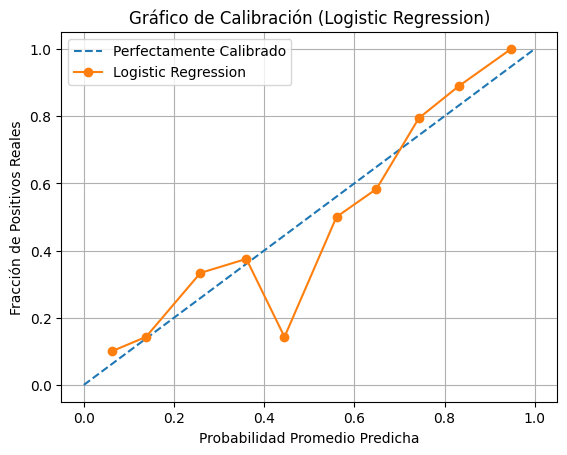

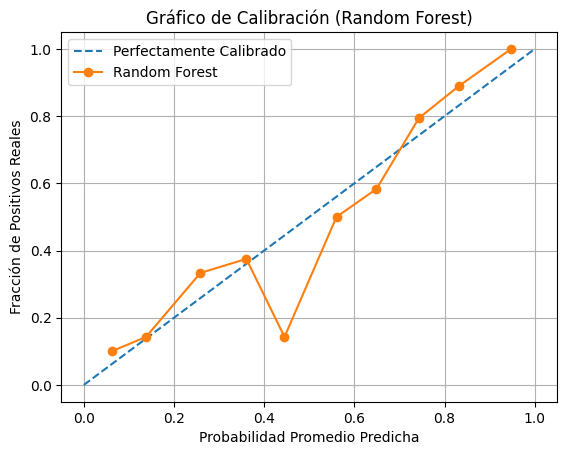

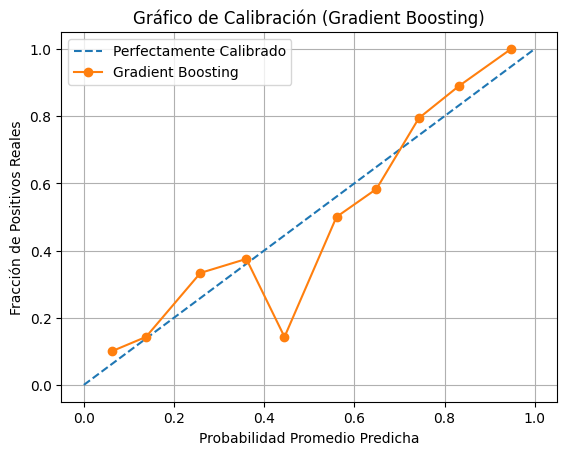

In [81]:
from sklearn.calibration import calibration_curve
def plot_calibration_curve(y_true, y_proba, model_name):
    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10)
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente Calibrado')
    plt.plot(prob_pred, prob_true, marker='o', label=model_name)
    plt.xlabel('Probabilidad Promedio Predicha')
    plt.ylabel('Fracción de Positivos Reales')
    plt.title(f'Gráfico de Calibración ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_calibration_curve(y_test, y_proba, 'Logistic Regression')
plot_calibration_curve(y_test, y_proba, 'Random Forest')
plot_calibration_curve(y_test, y_proba, 'Gradient Boosting')


--- Tabla Comparativa de Métricas de Modelos ---
                   Logistic Regression  Random Forest  Gradient Boosting  \
Accuracy                      0.810056       0.810056           0.810056   
Precision                     0.746479       0.753623           0.746479   
Recall                        0.768116       0.753623           0.768116   
F1-Score                      0.757143       0.753623           0.757143   
ROC-AUC                       0.885244       0.848880           0.854480   
PR-AUC                        0.832019       0.826204           0.837800   
Balanced Accuracy             0.802240       0.799539           0.802240   
MCC                           0.601397       0.599078           0.601397   
Brier Score                   0.131681       0.145214           0.132243   
ECE                           0.103659       0.104797           0.074540   

                   Support Vector Machine  
Accuracy                         0.793296  
Precision                

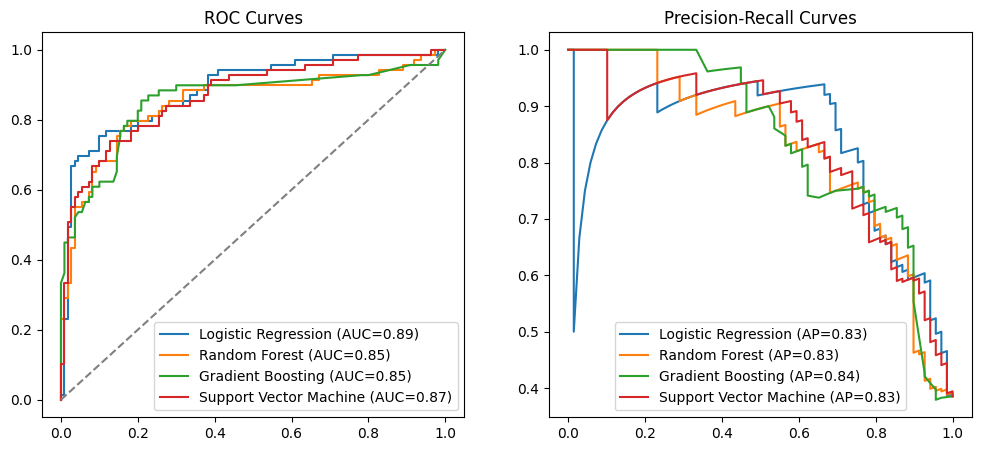

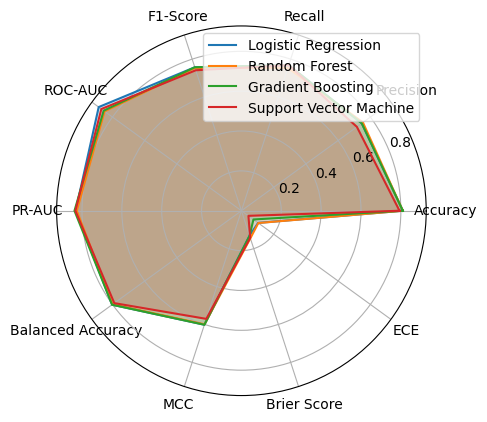

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, balanced_accuracy_score, matthews_corrcoef,
    brier_score_loss, precision_recall_curve, roc_curve
)
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import f_oneway

# Esta función realiza la prueba de McNemar, para comparar el rendimiento de dos clasificadores en los mismos datos.
# Evalúa si hay una diferencia significativa en sus tasas de error.
# Devuelve el valor p el cual sirve para indicar la probabilidad de detectar diferencia por casualidad

def mcnemar_test(y_true, y_pred1, y_pred2):
    table = pd.crosstab(y_pred1 == y_true, y_pred2 == y_true)
    result = mcnemar(table.values, exact=True)
    return result.statistic, result.pvalue, table

# Esta función calcula intervalos de confianza por medio del método de bootstrapping.
# El bootstrapping es una técnica de remuestreo que nos ayuda a estomar la
# distribución específica de los datos.
# Da un entendimiento de la variabilidad del rendimiento del modelo

def bootstrap_ci(y_true, y_pred, metric_fn, n_boot=500):
    rng = np.random.RandomState(0)
    stats = []
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    for _ in range(n_boot):
        idx = rng.randint(0, len(y_true), len(y_true))
        stats.append(metric_fn(y_true[idx], y_pred[idx]))
    est = metric_fn(y_true, y_pred)
    return est, np.percentile(stats, 2.5), np.percentile(stats, 97.5)

def plot_roc_pr(models_probs, y_true):
    plt.figure(figsize=(12,5))
    # Curvas ROC (Receiver Operating Characteristic)
    # Nos ayuda para evaluar ,a capacidad de un modelo para distinguir entre clases
    plt.subplot(1,2,1)
    for name, probs in models_probs.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        auc = roc_auc_score(y_true, probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    plt.plot([0,1],[0,1],'--',c='gray'); plt.legend(); plt.title("ROC Curves")

    # Curvas Precision-Recall
    # Nos da una comparación visual de su rendimiento
    plt.subplot(1,2,2)
    for name, probs in models_probs.items():
        prec, rec, _ = precision_recall_curve(y_true, probs)
        ap = average_precision_score(y_true, probs)
        plt.plot(rec, prec, label=f"{name} (AP={ap:.2f})")
    plt.legend(); plt.title("Precision-Recall Curves")
    plt.show()

def plot_radar(metrics_dict):
    labels = list(next(iter(metrics_dict.values())).keys())
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(subplot_kw={"polar":True})
    for model, mvals in metrics_dict.items():
        vals = list(mvals.values())
        vals += vals[:1]
        ax.plot(angles, vals, label=model)
        ax.fill(angles, vals, alpha=0.2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.legend(); plt.show()


all_metrics = {}
all_probs = {}
all_preds = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    current_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "PR-AUC": average_precision_score(y_test, y_proba),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "Brier Score": brier_score_loss(y_test, y_proba),
        "ECE": expected_calibration_error(y_test, y_proba)
    }

    all_metrics[name] = current_metrics
    all_probs[name] = y_proba
    all_preds[name] = y_pred

# DataFrame comparativo
comparison_df = pd.DataFrame(all_metrics)
print("\n--- Tabla Comparativa de Métricas de Modelos ---")
print(comparison_df)

# McNemar test entre los dos primeros modelos
model_names = list(all_preds.keys())
if len(model_names) >= 2:
    stat, pval, table = mcnemar_test(y_test, all_preds[model_names[0]], all_preds[model_names[1]])
    print("\n--- McNemar Test ---")
    print("Stat:", stat, "p-value:", pval)
    print("Contingencia:\n", table)

# Intervalos de confianza con bootstrap
print("\n--- Intervalos de confianza ---")
for name, y_pred in all_preds.items():
    acc, lo, hi = bootstrap_ci(y_test, y_pred, accuracy_score)
    print(f"{name}: Accuracy={acc:.3f}, 95% CI=({lo:.3f}, {hi:.3f})")


# Visualizaciones
plot_roc_pr(all_probs, y_test)
plot_radar(all_metrics)


Mejores modelos: ['Logistic Regression', 'Gradient Boosting']

--- Análisis de Errores para Logistic Regression ---
error_type
Correcto    145
FP           18
FN           16
Name: count, dtype: int64

--- Análisis de Errores para Gradient Boosting ---
error_type
Correcto    145
FP           18
FN           16
Name: count, dtype: int64

--- 20 Casos con mayor incertidumbre ---
       Pclass       Age     SibSp     Parch      Fare  FamilySize   IsAlone  \
40   0.827377  0.817561  0.432793 -0.473674 -0.457645    0.059160 -1.231645   
698 -1.566107  1.509209  0.432793  0.767630  1.584179    0.679295 -1.231645   
38   0.827377 -0.873136  1.340132 -0.473674 -0.285997    0.679295 -1.231645   
279  0.827377  0.433312  0.432793  0.767630 -0.240694    0.679295 -1.231645   
351 -1.566107 -0.104637 -0.474545 -0.473674  0.056292   -0.560975  0.811922   
515 -1.566107  1.355510 -0.474545 -0.473674  0.036577   -0.560975  0.811922   
559  0.827377  0.510161  0.432793 -0.473674 -0.298078    0.059160 -

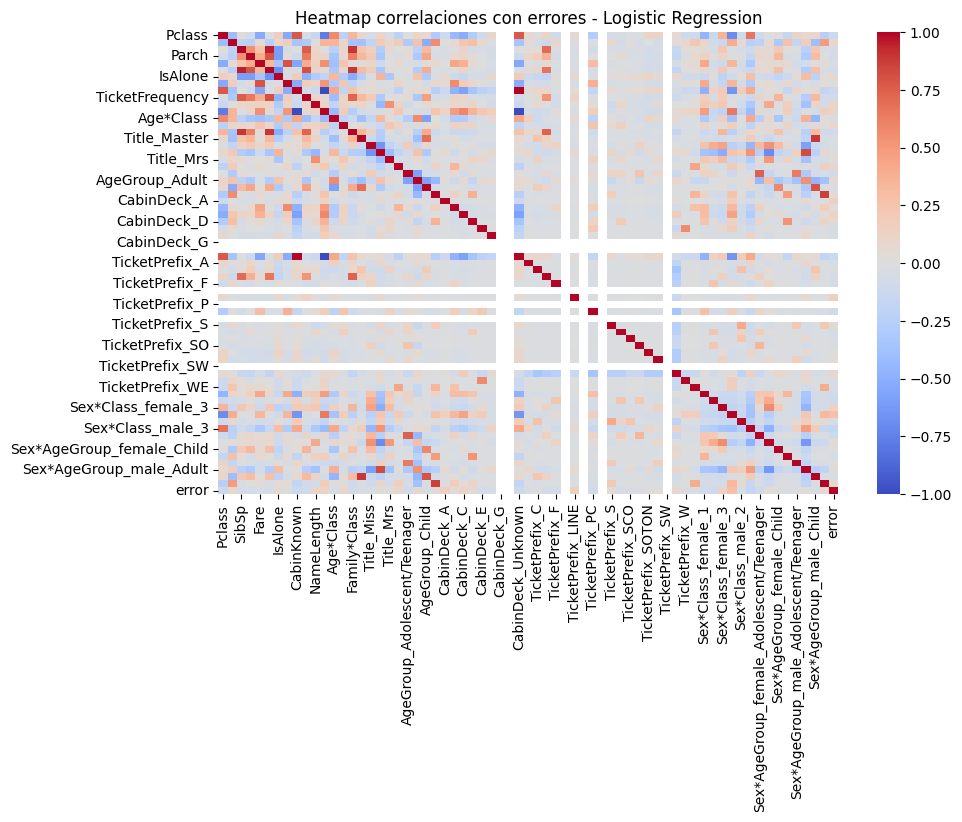

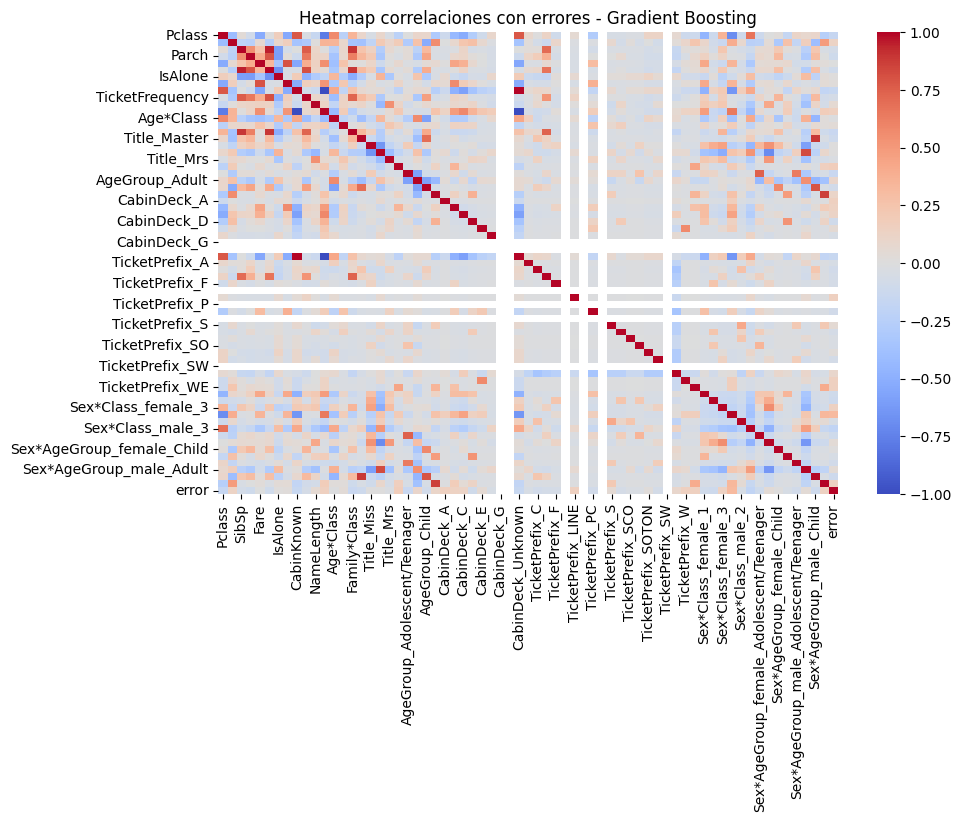

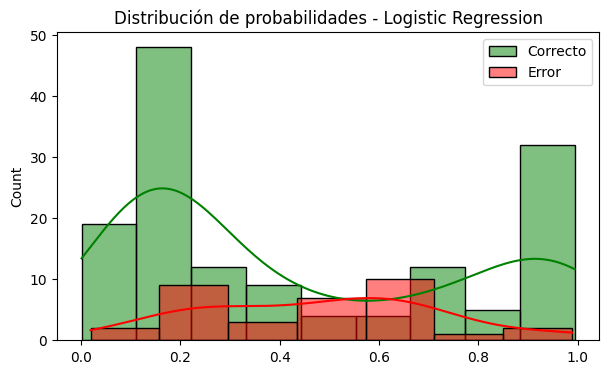

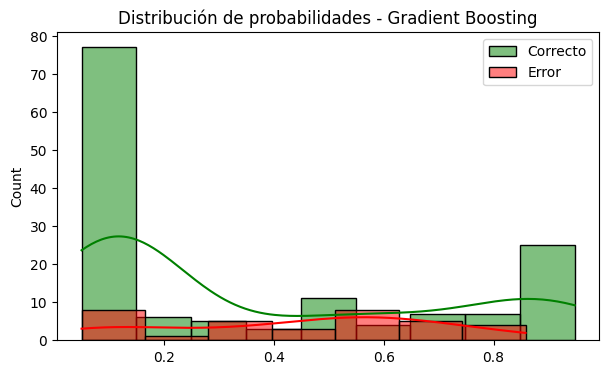

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


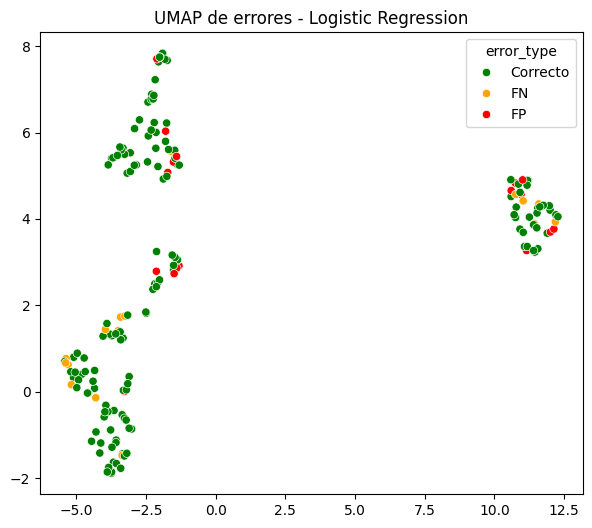

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


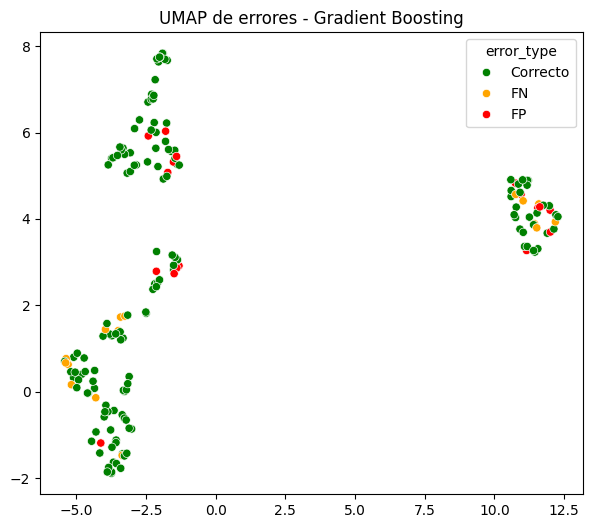

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Seleccionamos los 2 mejores modelos (por Accuracy o F1)

sorted_models = sorted(all_metrics.items(), key=lambda x: x[1]["F1-Score"], reverse=True)
best_two = [m[0] for m in sorted_models[:2]]
print("Mejores modelos:", best_two)

# Diccionarios
preds_best = {m: all_preds[m] for m in best_two}
probs_best = {m: all_probs[m] for m in best_two}


# Caracterización de Errores
for model in best_two:
    # Convert X_test back to a DataFrame with original index and columns for analysis
    X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=X_df.columns)

    df_errors = X_test_df.copy()
    df_errors["y_train"] = y_test
    df_errors["y_pred"] = preds_best[model]
    df_errors["error_type"] = np.where(
        (df_errors["y_train"] == 1) & (df_errors["y_pred"] == 0), "FN",
        np.where((df_errors["y_train"] == 0) & (df_errors["y_pred"] == 1), "FP", "Correcto")
    )

    print(f"\n--- Análisis de Errores para {model} ---")
    print(df_errors["error_type"].value_counts())


# B. Casos Difíciles

uncertainty = {}
for model in best_two:
    probs = probs_best[model]
    unc = np.abs(probs - 0.5)   # más cerca a 0.5 = más incierto
    uncertainty[model] = unc

# Promedio entre ambos modelos
avg_uncertainty = (uncertainty[best_two[0]] + uncertainty[best_two[1]]) / 2
difficult_idx = np.argsort(avg_uncertainty)[:20]

print("\n--- 20 Casos con mayor incertidumbre ---")
# Use the DataFrame version of X_test for iloc
X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=X_df.columns)
print(X_test_df.iloc[difficult_idx])
print("\nPredicciones comparadas:")
for model in best_two:
    print(f"{model}:", preds_best[model][difficult_idx])


# C. Visualización de Errores

# 1. Heatmap de errores por características
for model in best_two:
    # Use the DataFrame version of X_test for analysis
    X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=X_df.columns)
    df_vis = X_test_df.copy()
    df_vis["error"] = (y_test != preds_best[model]).astype(int)
    plt.figure(figsize=(10,6))
    sns.heatmap(df_vis.corr(), cmap="coolwarm", center=0)
    plt.title(f"Heatmap correlaciones con errores - {model}")
    plt.show()

# 2. Distribución de probabilidades correctos vs incorrectos
for model in best_two:
    probs = probs_best[model]
    correct_mask = (y_test == preds_best[model])
    plt.figure(figsize=(7,4))
    sns.histplot(probs[correct_mask], color="green", label="Correcto", kde=True)
    sns.histplot(probs[~correct_mask], color="red", label="Error", kde=True)
    plt.title(f"Distribución de probabilidades - {model}")
    plt.legend(); plt.show()

# 3. t-SNE o UMAP coloreado por tipo de error
for model in best_two:
    # Use the DataFrame version of X_test for analysis
    X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=X_df.columns)
    df_tsne = X_test_df.copy()
    df_tsne["error_type"] = np.where(
        (y_test==1)&(preds_best[model]==0), "FN",
        np.where((y_test==0)&(preds_best[model]==1), "FP", "Correcto")
    )

    reducer = umap.UMAP(random_state=0)
    # UMAP expects a numpy array, so use X_test directly here
    emb = reducer.fit_transform(X_test)

    plt.figure(figsize=(7,6))
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=df_tsne["error_type"], palette={"Correcto":"green","FP":"red","FN":"orange"})
    plt.title(f"UMAP de errores - {model}")
    plt.show()